In [196]:
## Using tensorflow gpu
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [6]:
import numpy as np
import re 
from sklearn.model_selection import train_test_split
import os, shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
import pandas as pd

In [7]:
from tensorflow.keras.optimizers import Adam

Importing data

In [8]:
from fashion_mnist.utils import mnist_reader

In [176]:
X_train, y_train = mnist_reader.load_mnist('fashion_mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion_mnist/data/fashion', kind='t10k')

In [177]:
X_train.shape

(60000, 784)

In [11]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train,test_size = 0.2,random_state = 12345)

In [12]:
X_test[0].shape

(784,)

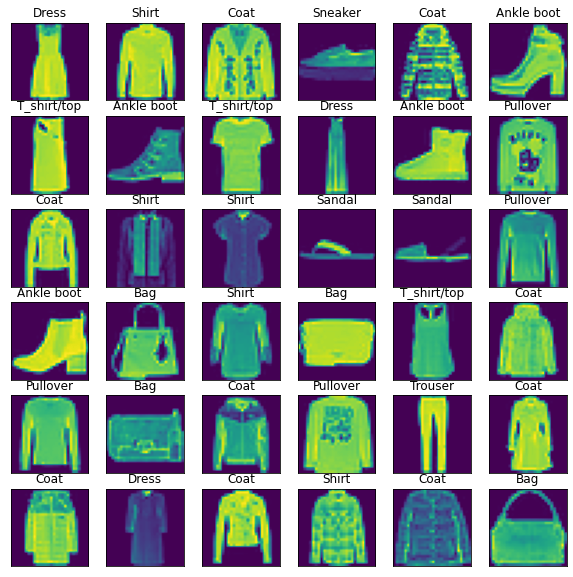

In [13]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

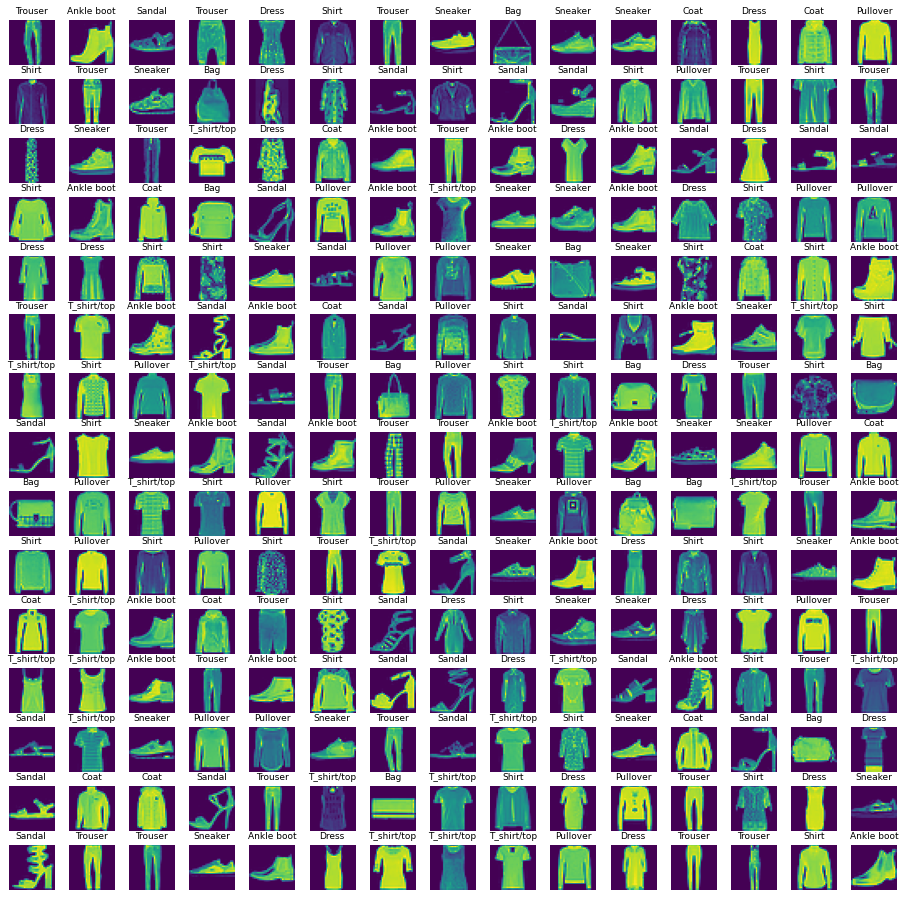

In [14]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index].reshape((28,28)) )
    labelindex = int(y_train[index])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [15]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [16]:
X_train = X_train.reshape(X_train.shape[0],*image_shape)
X_test = X_test.reshape(X_test.shape[0],*image_shape)
X_validate = X_validate.reshape(X_validate.shape[0],*image_shape)

In [17]:
image_shape

(28, 28, 1)

In [18]:
X_validate.shape

(12000, 28, 28, 1)

In [19]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

In [20]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [21]:
history = cnn_model.fit(
    X_train,
    y_train,
    batch_size=4096,
    epochs=10,
    verbose=1,
    validation_data=(X_validate,y_validate),
)

2022-05-06 19:59:38.387291: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-06 19:59:38.419598: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2400000000 Hz


Epoch 1/10


2022-05-06 19:59:38.771927: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-05-06 19:59:39.114466: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-05-06 19:59:39.140825: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


12/12 [==============================] - 3s 102ms/step - loss: 31.7107 - accuracy: 0.1847 - val_loss: 2.1318 - val_accuracy: 0.3562
Epoch 2/10
12/12 [==============================] - 1s 48ms/step - loss: 2.0087 - accuracy: 0.3233 - val_loss: 1.7364 - val_accuracy: 0.3907
Epoch 3/10
12/12 [==============================] - 1s 48ms/step - loss: 1.7176 - accuracy: 0.3710 - val_loss: 1.5950 - val_accuracy: 0.3853
Epoch 4/10
12/12 [==============================] - 1s 49ms/step - loss: 1.5767 - accuracy: 0.3753 - val_loss: 1.5066 - val_accuracy: 0.4086
Epoch 5/10
12/12 [==============================] - 1s 48ms/step - loss: 1.5126 - accuracy: 0.4063 - val_loss: 1.4759 - val_accuracy: 0.5164
Epoch 6/10
12/12 [==============================] - 1s 49ms/step - loss: 1.4712 - accuracy: 0.5050 - val_loss: 1.4472 - val_accuracy: 0.5167
Epoch 7/10
12/12 [==============================] - 1s 49ms/step - loss: 1.4551 - accuracy: 0.5060 - val_loss: 1.4173 - val_accuracy: 0.5228
Epoch 8/10
12/12 [====

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Train - Accuracy')

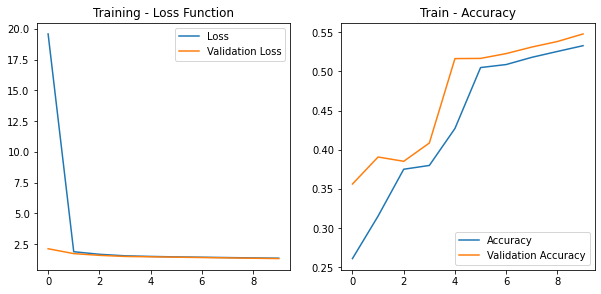

In [23]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [24]:
score = cnn_model.evaluate(X_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 1.3374
Test Accuracy : 0.5411


In [89]:
idx = 10

In [90]:
t = np.array([X_test[idx]])

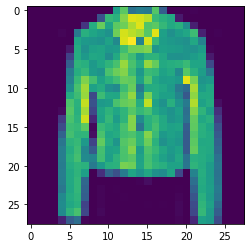

In [91]:
plt.imshow( X_test[idx].reshape((28,28)) )

In [92]:
np.argmax(cnn_model.predict(t))

2

In [93]:
class_names[np.argmax(cnn_model.predict(t))]

'Pullover'